## MLR model for the prediction of demand for shared bikes

### <font color = Green > Business Understanding </font>

+ A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
+ Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### <font color = Green > Problem Statement </font>

+ A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 
+ So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
+ In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 
+ They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
+ Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    + **Which variables are significant in predicting the demand for shared bikes.**
    + **How well those variables describe the bike demands**
+ Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### <font color = Green > Business Goal </font>

+ You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 
+ They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### <font color = Green > Steps Followed </font>

1. Reading and Cleaning the Data
2. Understanding the Data
3. EDA
4. Preparing the Data for modelling (tarin-test split, dummy and rescalling etc)
5. Training the model
6. Residual Analysis
7. Predictions and Evaluation on the test set
8. Final Report

### <font color = Green > Potential Causes for the shared bikes demand could be: </font>

1. Time & Season of the year
2. Special Holidays
3. Weather conditions
4. Working day or Non-Working day
5. Ratio of casual vs registered users

**Target variable is cnt: count of total rental bikes including both casual and registered**

### Task - 1: Reading and Cleaning the dataset 

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Setting the Data Display Size

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Read the csv file using 'read_csv'. 

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for of missing values in columns

(bike.isnull().sum()/len(bike)*100).sort_values(ascending = False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [8]:
# Checking for of missing values in rows

(bike.isnull().sum(axis=1)/len(bike)*100).sort_values(ascending = False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

In [9]:
# Duplicate check:

duplicate = bike.copy()
duplicate.drop_duplicates(subset = None, inplace = True)
duplicate.shape

(730, 16)

### <font color = Green > Inference: </font>

+ There are no Null values, 4 float values, 11 integer values and 1 object.
+ There are no duplicate values as the shape of the orginal dataframe and duplicate is same.
+ dteday is not only the categorical column explicitly. 
+ season, yr, mnth, holiday, weekday, workingday, weathersit are actually categorical columns with labels.

In [10]:
# Checking for unwanted values present to convert and standardised them for better analysis

bike_dummy=bike.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

09-07-2018    1
15-07-2018    1
09-01-2018    1
28-11-2018    1
30-05-2018    1
             ..
15-09-2018    1
06-12-2018    1
13-09-2019    1
16-04-2019    1
07-07-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



1    365
0    365
Name: yr, dtype: int64 



12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
19.850847    4
26.615847    4
29.144153    4
17.937500    4
21.832500    3
29.861653    3
16.126653    3
14.486653    3
19.372500    3
22.550000    3
21.730000    3
14.042500    3
28.392500    3
1

### <font color = Green > Inference: </font>

+ There are no unwanted values present that needs to be converted

In [11]:
# Converting date to Pandas datetime format

bike['dteday'] = pd.to_datetime(bike['dteday'])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Task - 2: Understanding the dataset 

In [12]:
# Statistical Understanding of the Numeric columns:

bike[['temp','atemp','hum','windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <font color = Green > Inference: </font>

+ A minimum of 2-3 Degree Celsius upto 35-45 Degree Celsius Temperature has been felt. 
+ Humidity has gone upto 97 units starting from 0. 
+ A standard Gentle and Fresh breeze speed is witnessed between 12 - 38 km/h speed. Our data interpret the same if the units are in km/h. 
+ Almost all of their mean and median is almost the same or very close. 
+ The overall count of Casual Users seems less with compare to Registered Ones.
+ We will plot them below for a better visualisation. 

### Task - 3: Exploatory Data Analysis

### Univariate Analysis

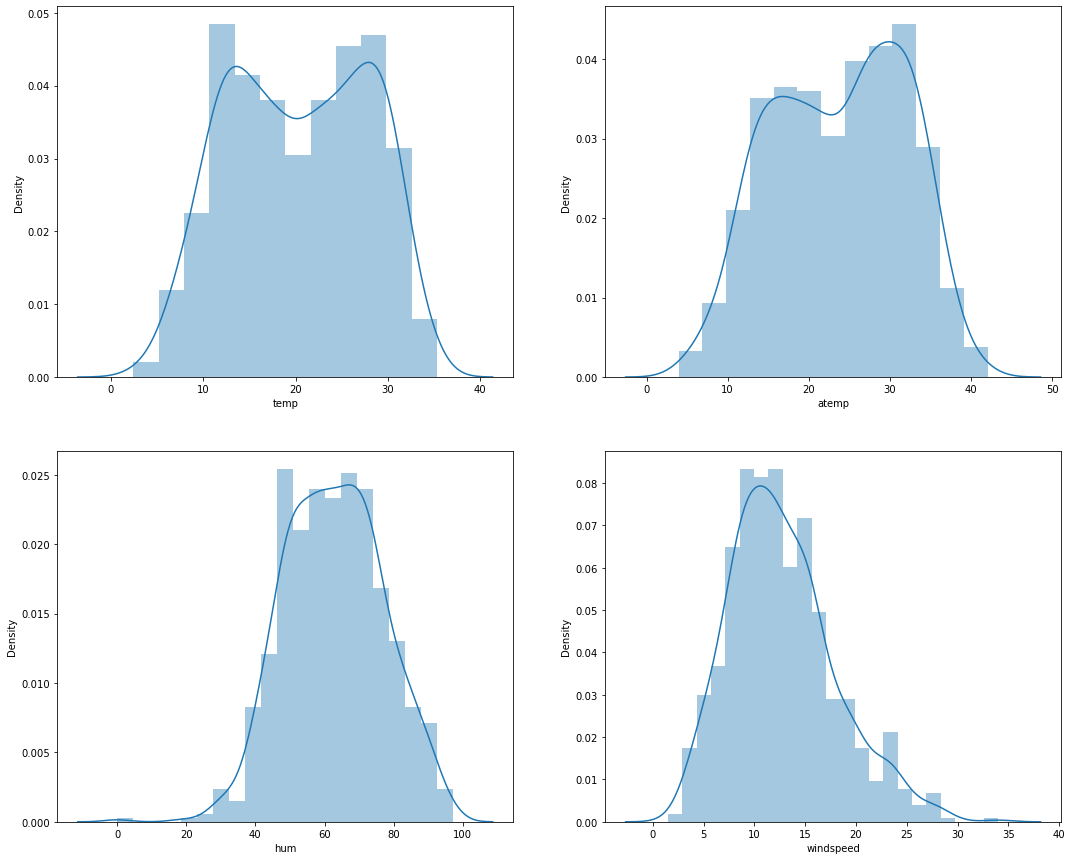

In [13]:
num_cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=[18,15])

for n,col in enumerate(num_cols):
    plt.subplot(2,2,n+1)
    sns.distplot(bike[col])

### <font color = Green > Inference: </font>

+ We need to witness the temp change in comparision to both the years i.e 2018 and 2019.
+ Humidity seems to be a little Negatively skewed. Their mean and median is also the same. 
+ Similarly, windspeed seems to be a little Positvely skewed. Their mean and median is also the same. 

In [14]:
for n,col in enumerate(num_cols):
    print(col+": "+str(bike[col].skew()))

temp: -0.05718748619696199
atemp: -0.13370861358035466
hum: -0.06747586253218554
windspeed: 0.6763140387852972


+ Turns out, temperature is also negatively skewed but it's skewness is between -0.5 and 0.5, which denotes it is approximatey symmetric.

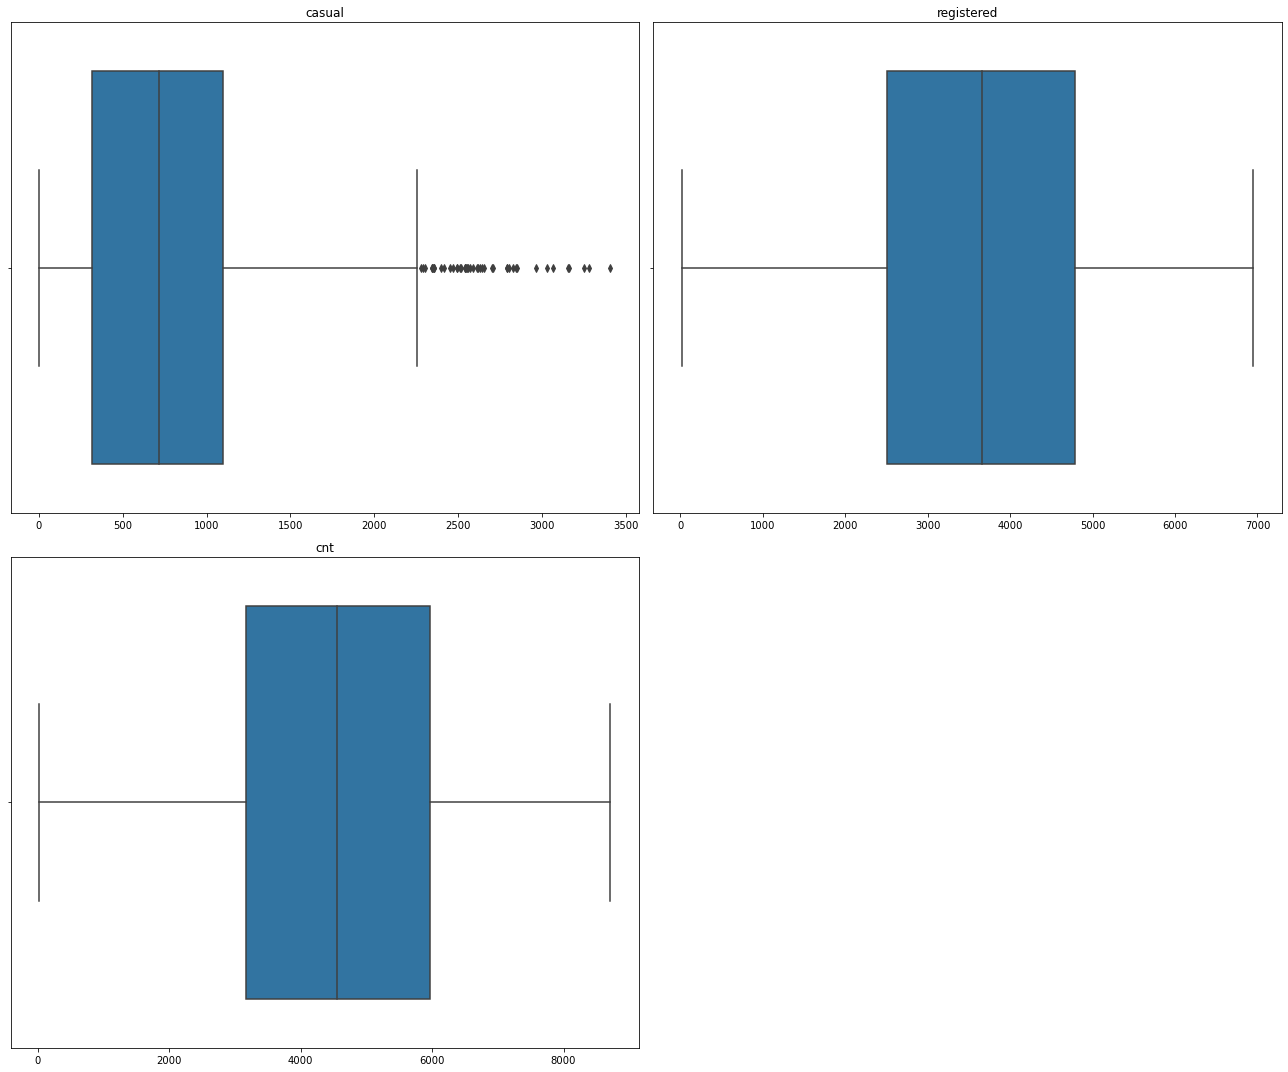

In [15]:
num_cols = ['casual', 'registered', 'cnt']
plt.figure(figsize=[18,15])

for n,col in enumerate(num_cols):
    plt.subplot(2,2,n+1)
    sns.boxplot(bike[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

In [16]:
for n,col in enumerate(num_cols):
    print(col+": "+str(bike[col].skew()))

casual: 1.2663277435764353
registered: 0.0412110579102227
cnt: -0.04958060487648213


### <font color = Green > Inference: </font>

+ As we can clearly see, Casual Users is highly skewed as it is greater than 1 and posses outliers too.
+ Registered users does not posses oultiers and seems to be near 0 in terms of skewness. 
+ Also, the overall count of Casual users are less as compare to Registered ones.
+ Count being the total of both, seems to be a perfect shape of boxplot, it's skewness is between -0.5 and 0.5, which denotes it is approximatey symmetric.


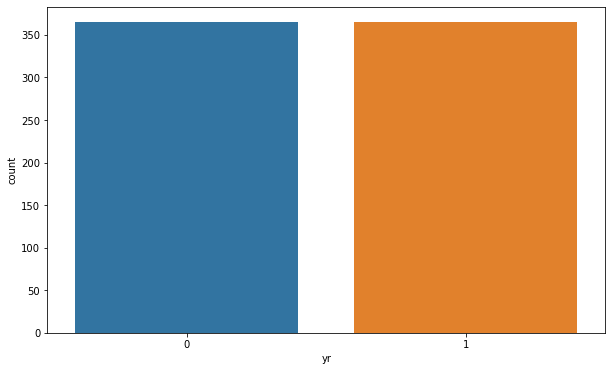

In [17]:
# Looking at the data distribution in both the years 2018 and 2019

plt.figure(figsize=[10,6])
sns.countplot(bike.yr)
plt.show()

### <font color = Green > Inference: </font>
+ The data is equally distributed in both the years.


In [18]:
# Looking at the ratio of working days vs holidays.

bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

### <font color = Green > Inference: </font>
+ 70% of the days were working.
+ 30% of the days were holiday.
+ Out of 730 days, 504 were working days and 226 were not working days.

In [19]:
# Looking at the ratio of data for different weather conditions

bike.weathersit.value_counts(normalize = True)*100

1    63.424658
2    33.698630
3     2.876712
Name: weathersit, dtype: float64

### <font color = Green > Inference: </font>

+ 63% of the data had captured where it was almost clear sky or partly cloudy.
+ 34% of the data had captured where it was misty with a bit cloudy sky.
+ 3% of the data had captured where it was either lighty snowy or lightly raining with some scattered clouds and thunderstorms.


In [20]:
bike.season.value_counts(normalize = True)*100

3    25.753425
2    25.205479
1    24.657534
4    24.383562
Name: season, dtype: float64

### <font color = Green > Inference: </font>

+ Season seems to be equally distributed in the both the years with equal time momentum. 
+ As there are 24 months, each season lasted for 6 months (25%) in 24 months, that means 3 month each in one year.


### Bi/Multivariate Analysis

In [21]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
# Droping holiday as workingday covers the relateable information

bike.drop('holiday',axis=1,inplace=True)

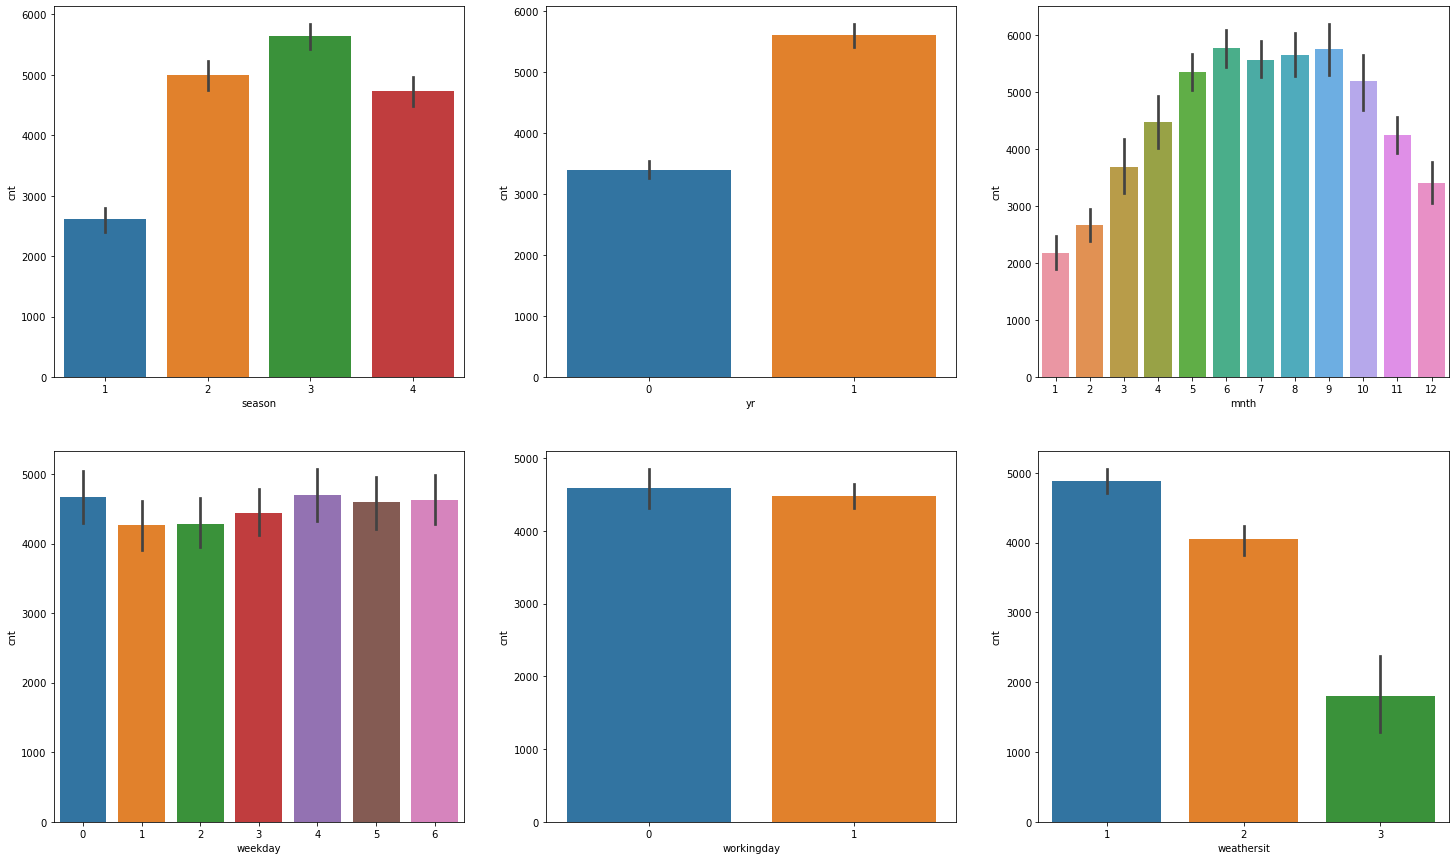

In [23]:
# Looking at Categorical variables against the target variable cnt. 

plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.barplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.barplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.barplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

### <font color = Green > Inference: </font>

+ **season**: We can see that the season 3 i.e Fall has made the highest number of bookings, followed by season 2(Summer) and season 4(winter).
+ **yr**: We can clearly see that the number of bookings made in the subsequent year 2019 is more that the year 2018. That means the demand is increasing. 
+ **mnth**: Higher number of bookings were made in the month (5,6,7,8,9 and 10) in both the years. 
+ **weekday**: This variable seems to have equal amount of bookings made in all days of the week, hence will not be that impactful predictor.
+ **workingday**: This was the most suprising thing to notice that the higher number of bookings either causal or registered were made on the non-working day, will verify this below. 
+ **weathersit**: We can see that the weather 1 (Clear/Partly Cloudy Sky) has made the highest number of bookings. This is followed by weather 2 (Misty/Cloudy sky), could be a good predictor too. 



In [24]:
bike.groupby(['workingday'])[['cnt']].sum()

,cnt
workingday,
0,1036857
1,2253988


+ As verified, more number of bookings were made on the working day and not on non-working days.

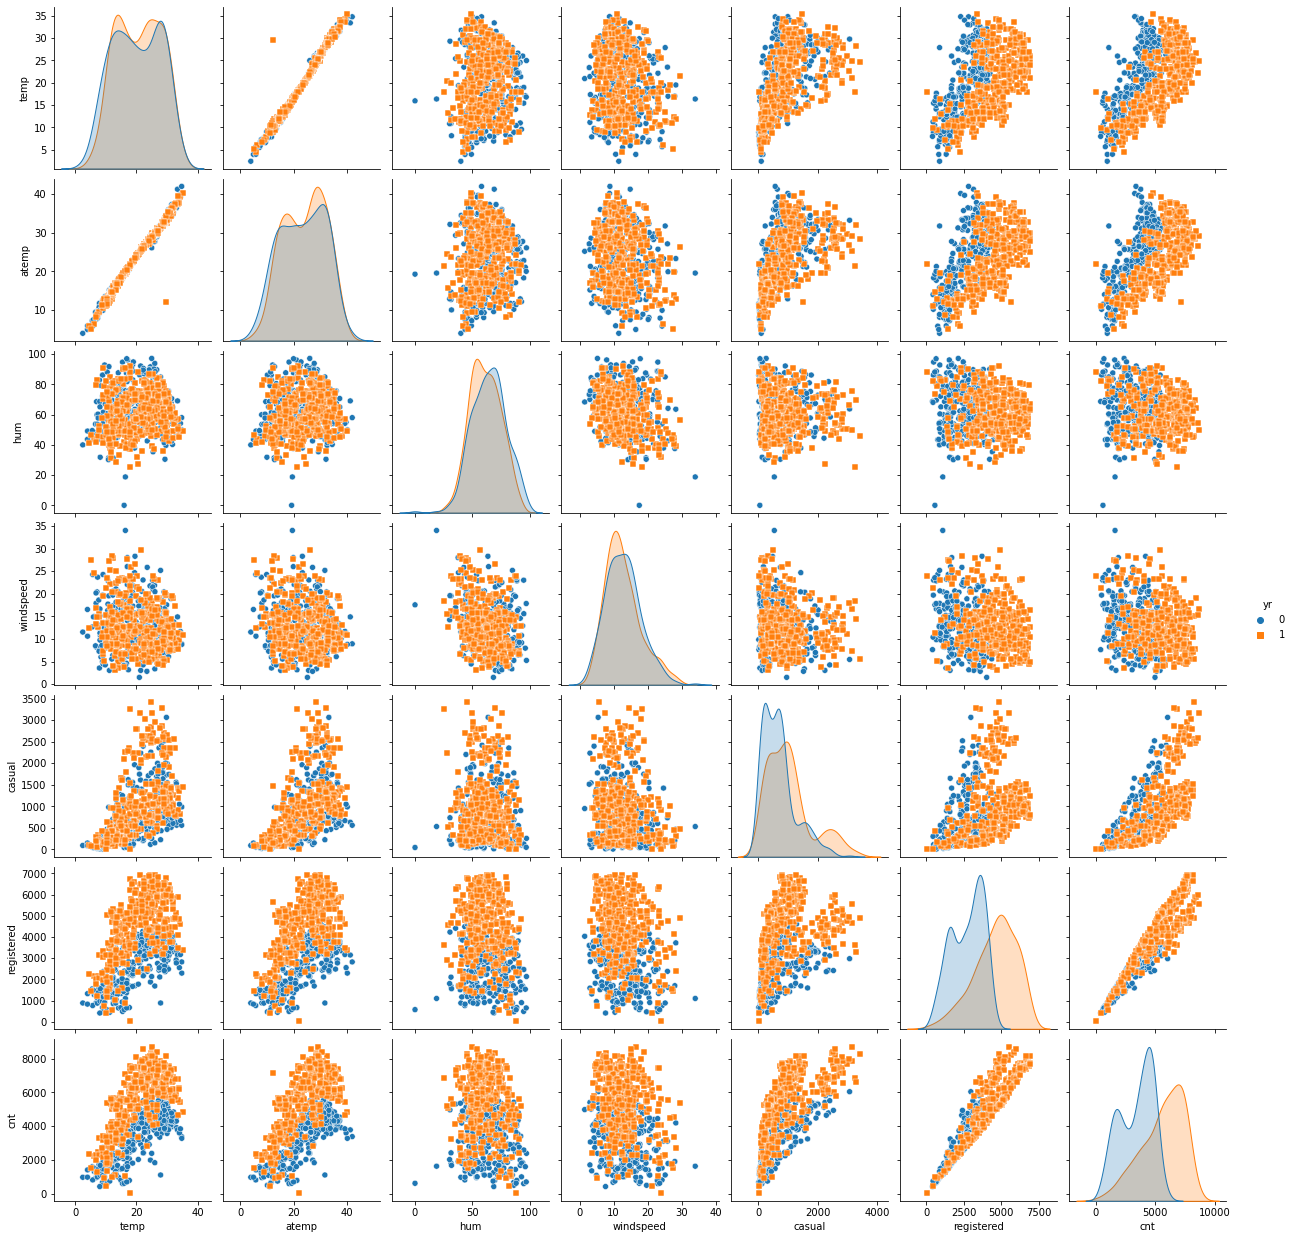

In [25]:
# Visualising Numeric Variables

sns.pairplot(bike[['yr','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']],
            vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], 
            hue = 'yr',  markers=['o', 's'])
plt.show()

### <font color = Green > Inference: </font>

+ Registered Users is Highly Correlated with the target variable followed by Casual Users which is not suprising as cnt is the total of both the features. 
+ Also, temp is highly correlated to atemp hence dropping atemp.
+ Whereas temp or you could say atemp are the top correlated variables with the target variable. That means, temperature of the day is the biggest factor in the demand for using shared bike services. 
+ Humidity and Windspeed seems not to be correlated with the target variable at all. 

In [26]:
# Droping atemp as temp and atemp are highly corelated

bike.drop('atemp',axis = 1, inplace = True)
bike.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


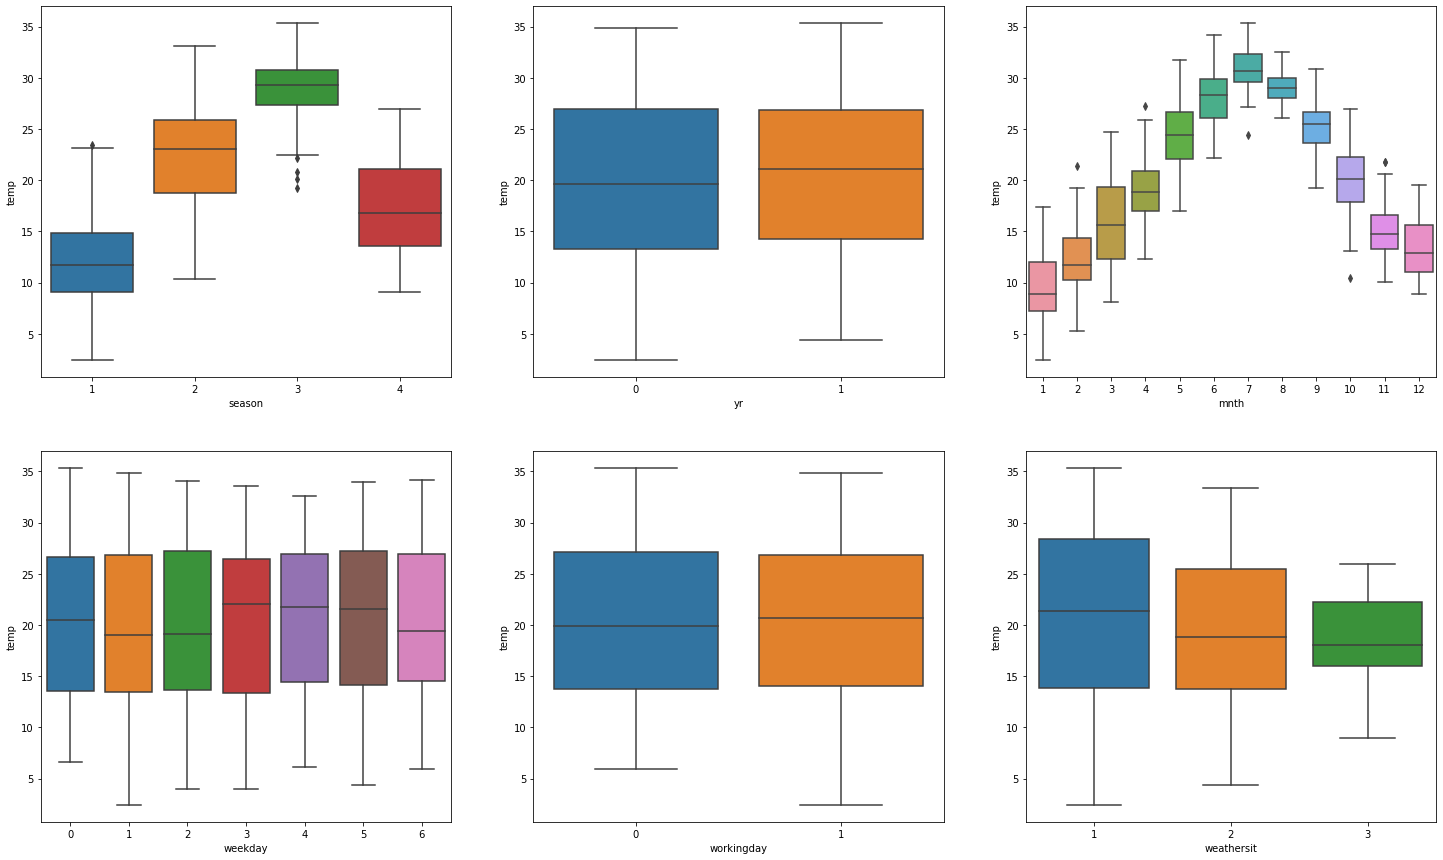

In [27]:
# witnessing change in temp against the categirical variables, thus verifying temp being the strongest predictor: 

plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'temp', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'temp', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'temp', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'temp', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'temp', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'temp', data = bike)
plt.show()

### <font color = Green > Inference: </font>

+ Comparing this with the above categorical variables against cnt (target variable), we can conclude that that the temp will be the strongest predictor.

### Task - 4: Preparing the Data for Modelling

In [28]:
bike.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


### <font color = Green > Way Forward: </font>

+ We have identified few categories in our categorical columsn that will be a good predictor to our dependent variable but not all. Hence we will convert them into Dummy variables.
+ We will not be requiring the entire dataset as there are some reductant variables too. Hence converting the original dataset into bike_new. 
+ We will leave behind the casual and registered columns as they are not rquired in model building


In [29]:
bike_new = bike[['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed','cnt']]
bike_new.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


#### Creating Dummy Variables
    
+ season
+ mnth
+ workingday
+ weathersit

We will not keep weekday as it is a week predictor

In [30]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [31]:
# Before coverting them into our Dummy variables, let's first convert them into categorical datatypes: 

bike_new['season'] = bike_new['season'].astype('category')
bike_new['mnth'] = bike_new['mnth'].astype('category')
bike_new['workingday'] = bike_new['workingday'].astype('category')
bike_new['weathersit'] = bike_new['weathersit'].astype('category')

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   weekday     730 non-null    int64   
 4   workingday  730 non-null    category
 5   weathersit  730 non-null    category
 6   temp        730 non-null    float64 
 7   hum         730 non-null    float64 
 8   windspeed   730 non-null    float64 
 9   cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(3)
memory usage: 38.0 KB


In [32]:
# creating dummy variables

bike_new = pd.get_dummies(bike_new, drop_first = True)
bike_new.head()

,yr,weekday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,workingday_1,weathersit_2,weathersit_3
0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,3,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,4,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,5,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Also dropping weekday as it has not much as a predictor

bike_new = bike_new.drop('weekday', axis = 1)

In [34]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   temp          730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    uint8  
 6   season_3      730 non-null    uint8  
 7   season_4      730 non-null    uint8  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

### Initial Steps before Model building

Before model building, you first need to perform the test-train split and scale the features.

**Splitting the Data set**

In [35]:
import sklearn
from sklearn.model_selection import train_test_split

In [36]:
bike_new_train, bike_new_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_new_train.shape)
print(bike_new_test.shape)

(510, 22)
(219, 22)


**Rescaling the Features**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# 1. Initiate and object 

scaler = MinMaxScaler()

# 2. Fit on data: applying scaler() to all the numeric variables

num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_new_train[num_vars] = scaler.fit_transform(bike_new_train[num_vars])
bike_new_train.head()

,yr,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,workingday_1,weathersit_2,weathersit_3
653,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
482,1,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [39]:
# Let's also verify this: 

bike_new_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### <font color = Green > Inference: </font>

+ Everything seems fine


### Task - 5: Training the Model

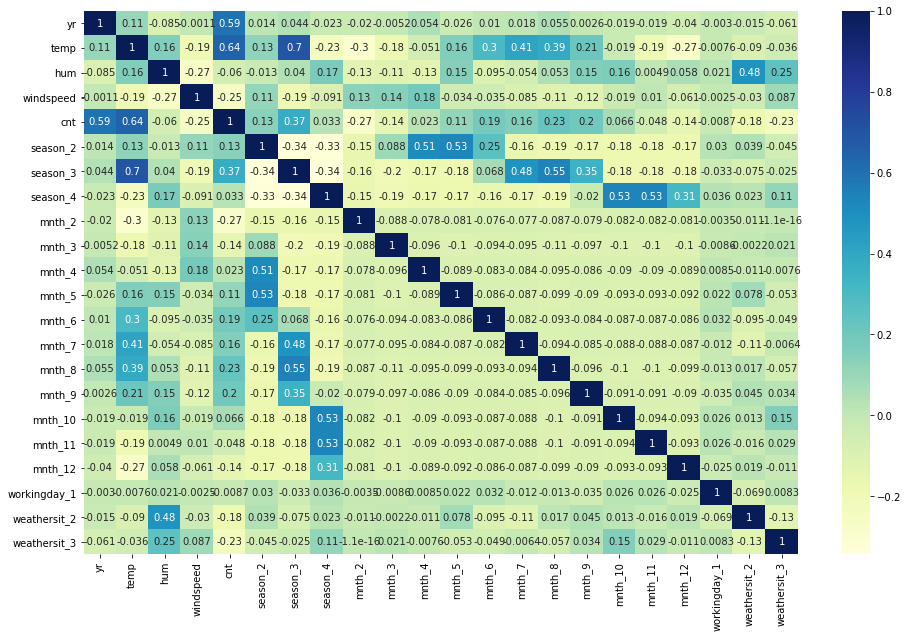

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_new_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color = Green > Inference: </font>

+ Since temp has the Highest Coefficient, we will start off with temp variable. 
+ This is followed by, yr, season_3, season_2 and months 6,7,8,9.
+ We also, some variables higly correlating to each other, and we will check not to consider them.

In [41]:
# X_train and y_train

X_train = bike_new_train
y_train = bike_new_train.pop('cnt')

In [42]:
X_train.head()

,yr,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,workingday_1,weathersit_2,weathersit_3
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
576,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1,0.442393,0.640189,0.255342,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
482,1,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

**While we Keep on adding the variable, there are two important things to look at after adding one variable**

+ statistical significance of that variable
+ VIF

**Building the Model - I**


In [44]:
# Let's Start with the base model / Simple Linear Model and import statsmodel library

import statsmodels.api as sm

**Linear Model: 1**

In [45]:
# Step-1: Add a constant
X_train_sm = sm.add_constant(X_train['temp'])

# Step-2: Creating our Model
lr = sm.OLS(y_train, X_train_sm)

# Step-3: Fitting the Model
lr_model = lr.fit()

# Step-4: Summary ofthe Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           5.80e-61
Time:                        15:25:41   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = Green > Inference: </font>

1. Significance can be seen by the P-values which should be less than 0.05 which means you can reject the Null and Alternate is true. P-values in our First model are 0, hence the model is significant with atemp.
2. R-squared is 41%, which means, 41% variance in 'cnt' is explained by atemp (feeling temperature). Which is not very bad but we need to improve the model. Hence, let's add another variable now. 

**Linear Model: 2**

In [46]:
# Step-1: Add a constant
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

# Step-2: Creating our Model
lr = sm.OLS(y_train, X_train_sm)

# Step-3: Fitting the Model
lr_model = lr.fit()

# Step-4: Summary ofthe Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          9.25e-130
Time:                        15:25:41   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = Green > Inference: </font>

1. Similarly, like above the p-values are o, hence the predictors are still significant
2. Moreover, the model has become more stronger as our r2 has increased up 69%. 

Let's add one more variable.
 


**Linear Model: 3**

In [47]:
# Step-1: Add a constant
X_train_sm = X_train[['temp', 'yr', 'season_3']]
X_train_sm = sm.add_constant(X_train_sm)

# Step-2: Creating our Model
lr = sm.OLS(y_train, X_train_sm)

# Step-3: Fitting the Model
lr_model = lr.fit()

# Step-4: Summary ofthe Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     389.0
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          6.16e-131
Time:                        15:25:41   Log-Likelihood:                 343.43
No. Observations:                 510   AIC:                            -678.9
Df Residuals:                     506   BIC:                            -661.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.017      3.087      0.002       0.019       0.085
temp           0.6665      0.034     19.531      0.000       0.599       0.734
yr             0.2356      0.011     21.323      0.000       0.214       0.257
season_3      -0.0607      0.017     -3.486      0.001      -0.095      -0.026
==============================================================================
Omnibus:                       36.351   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.794
Skew:                          -0.531   Prob(JB):                     2.08e-12
Kurtosis:                       4.185   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = Green > Inference: </font>

1. Just like above the p-values are o, hence the predictors added are significant but we can see that the variable season_3 added now has a negative coefficient. 
2. Moreover, the model has become more stronger as our r2 has increased up 70% and seems to be at our best. But, this is the most tedious way to create a model and hence we will adapt to a new approach followed bellow. 


**Building the Model - II**

The bottom-up approach was just to get an idea of how the parameters are changing when the number of variables is increasing. More generally, we first build a model using all and then try to improve the model by dropping some of them.


As we can see there are alot of predictors in the training set which are also correlated to each other and will cause the concern of Multicolinearity henceforth. 

Let's use **RFE** to identify the best variables.

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
X_train.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'workingday_1', 'weathersit_2', 'weathersit_3'], dtype='object')

In [50]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12, step=1)        
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 9),
 ('workingday_1', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'], dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'workingday_1'], dtype='object')

**MLR Model - 1**

In [54]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_rfe)

# Running and fitting the linear model
lm1_model = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          2.10e-188
Time:                        15:25:42   Log-Likelihood:                 504.51
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -928.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2363      0.027      8.648   

### <font color = Green > Inference: </font>

**We usually drop a variable by looking at its significance i.e P-value or we can supplement our decision by VIF**

1. You have the coef of all the variables as well as cosntant. 

2. `season_3` has a P-value of 0.184, which is not workable and should be less than 0.05; hence we will dropped to make the model stronger. 

3. if see, our model is strong as the r2 and adjusted r2 is same around 83%


In [55]:
X_train_new= X_train_new.drop('season_3',axis=1)

**MLR Model - 2**

In [56]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new)

# Running and fitting the linear model
lm2_model = sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lm2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          3.23e-189
Time:                        15:25:42   Log-Likelihood:                 503.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     498   BIC:                            -932.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2355      0.027      8.614   

### <font color = Green > Inference: </font>

1. You have the coef of all the variables as well as constant. 

2. `mnth_10` has a P-value of 0.023, which is workable as it should be less than 0.05; but we will dropped to make the model stronger.

3. Again, our model is strong as the r2 and adjusted r2 is same around 83%

In [57]:
X_train_new= X_train_lm2.drop('mnth_10',axis=1)

**MLR Model - 3**

In [58]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new)

# Running and fitting the linear model
lm3_model = sm.OLS(y_train,X_train_lm3).fit()

#Let's see the summary of our linear model
print(lm3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          2.62e-189
Time:                        15:25:42   Log-Likelihood:                 500.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     499   BIC:                            -933.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2278      0.027      8.361   

### <font color = Green > Inference: </font>

1. You have the coef of all the variables as well as constant. 

2. Our P-values of all coefficient is less than 0.05; hence we can say our model is significant.

3. Also, our model is strong as the r2 and adjusted r2 is same around 83%

+ But, let's look at our VIF values

In [59]:
X_train_new= X_train_lm3.drop('const',axis=1)

In [60]:
# Calculate the VIFs for the lm1 model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.26
1,temp,9.64
3,windspeed,3.57
8,weathersit_2,2.12
0,yr,2.01
4,season_2,1.81
5,season_4,1.75
6,mnth_8,1.59
7,mnth_9,1.31
9,weathersit_3,1.15


**`hum` is having high VIF; can be dropped**

In [61]:
X_train1 = X_train_new.drop(["hum"], axis = 1)
X_train1.head()

,yr,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1,0.509887,0.300794,0,1,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,0,1,0
728,1,0.245101,0.663106,0,0,0,0,0,0
482,1,0.395666,0.188475,1,0,0,0,1,0


**MLR Model - 4**

Rebuilding the model without `hum`

In [62]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train1)

# Running and fitting the linear model
lm4_model = sm.OLS(y_train,X_train_lm4).fit()

#Let's see the summary of our linear model
print(lm4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          6.57e-186
Time:                        15:25:42   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1264      0.017      7.511   

### <font color = Green > Inference: </font>

1. You have the coef of all the variables as well as constant. 

2. Similarly like above, our P-values of all coefficient is less than 0.05; hence we can say our model is significant.

3. But now, our r2 and adjusted r2 is not same around 83%, but it's fine

+ But, let's look at our VIF values

In [63]:
X_train_new= X_train_lm4.drop('const',axis=1)

In [64]:
# Calculate the VIFs for the lm2 model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.01
2,windspeed,3.08
0,yr,2.00
3,season_2,1.81
5,mnth_8,1.58
4,season_4,1.48
7,weathersit_2,1.48
6,mnth_9,1.30
8,weathersit_3,1.08


### <font color = Green > Final Inference of the Model: </font>

**All the variables have VIF less than or equal to 5 and it's perfect as they are also significant!**

+ We cannot drop Tempearture as it is the most significant and correlated variable to our dependent variable. 


#### Our Final Model 

lm4_model

### Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
# Computing the predicted y-values

y_train_pred = lm4_model.predict(X_train_lm4)

In [66]:
# Computing the residuals:

res = y_train - y_train_pred

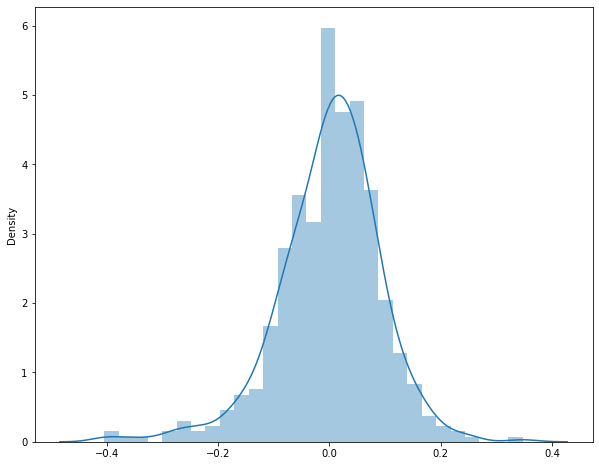

In [67]:
# Plotting the Histogram of the Residuals (Distribution of the Error terms)

plt.figure(figsize = [10,8])
sns.distplot(res)
plt.show()

### Step 7: Making Predictions and Evaluation on the test set 


#### Applying the scaling on the test sets

In [68]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_new_test[num_vars] = scaler.transform(bike_new_test[num_vars])
bike_new_test.head()

,yr,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,workingday_1,weathersit_2,weathersit_3
184,0,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
221,0,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
152,0,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [69]:
bike_new_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592
std,0.233698,0.148974,0.159947,0.218435
min,0.046591,0.261915,-0.042808,0.048205
25%,0.354650,0.527265,0.198517,0.377531
50%,0.558691,0.627737,0.299459,0.524275
75%,0.759096,0.743928,0.403048,0.672745
max,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [70]:
X_test = bike_new_test
y_test = bike_new_test.pop('cnt')

In [71]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8', 'mnth_9', 'weathersit_2', 'weathersit_3'], dtype='object')

In [72]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions

y_pred = lm4_model.predict(X_test_new)

### Model Evaluation

In [74]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.7909416676310566

Text(0, 0.5, 'y_pred')

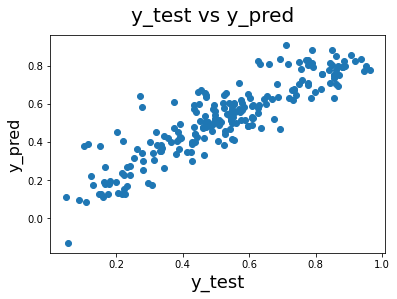

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ cnt = 0.1264 + (yr \times 0.2328) + (temp \times 0.5211) − (windspeed \times 0.1516) + (season2 \times 0.1016) + (season4 \times 0.1374) + (mnth_8 \times 0.0557) + (mnth_9 \times 0.1133) − (weathersit2 \times 0.0809) − (weathersit3 \times 0.2786) $

From the lm2_model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

**F Statistics¶**

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 270.8
Prob (F-statistic): 6.57e-186

The F-Statistics value of 270 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### Step - 7:  Final Report:

1. Our top 3 variables that are seen effecting the bike rental service count are: 

+ **Temperature (temp) with a coefficient of 0.5211:** This means a unit increase in temp variable increases the bike hire numbers by 0.5221 units.
+ **Weather3 i.e Light Snowy or Raing with Scatered Clouds and Thunderstorm (weathersit_3) with a coefficient of 0.2786:** This means a unit increase in weather_3 variable increases the bike hire numbers by 0.2786 units. 
+ **Year (yr) with a coefficient of 0.2328:** This means a we can clearly see a YOY increase in demand for the rental bike services. 


2. Assumptions:

+ After graphing the error terms on the train data with help of the histogram plot, we witness that the error terms are normally distributed. 
+ The accuracy of the train and test set are nearly equal. r2 of the train set is around 83% and r2 of the test set is around 79%.
+ After Plotting y_test and y_pred on a scatter plot, we can see that there is a Linear Relationship.

